In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import sys
import pickle
sys.path.append("../tools/") # DIFFERENT GITHUB PATH HERE

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data







### Task 1: Preliminary Feature Selection

financial_features = ['salary', 'deferral_payments', 'total_payments',
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income',
'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
'long_term_incentive', 'restricted_stock', 'director_fees']
## all units are in US dollars

email_features = ['to_messages', 'from_poi_to_this_person', 'email_address',
'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
## units are number of email messages, 'email_address' is a string

poi_label = ['poi'] ## boolean

email_features.remove('email_address') ## not numerical

## features_list is a list of strings, the first feature must be "poi".
features_list = poi_label + financial_features #+ email_features
## email_features excluded because of data leakage


### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )








### Task 2: Data Exploration and Outlier Removal (not enough data for 10% rule)

### Create Pandas Dataframe
import pandas as pd
import numpy as np
df = pd.DataFrame.from_dict(data_dict, orient = 'index')
#print df.isnull().any() ## our NaN values are actually strings
## we can replace string NaNs with 0 or real NaN
#df = df.replace('NaN', 0)
df = df.replace('NaN', np.nan) ## np.nan works better for summary and plotting


### Data Summary
print "\n\nData Inspection:\n\n", df.info()



Data Inspection:

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income           

In [3]:
print "\n\n\nData Summary:\n\n", df.describe()




Data Summary:

                salary   to_messages  deferral_payments  total_payments  \
count        95.000000     86.000000          39.000000    1.250000e+02   
mean     562194.294737   2073.860465     1642674.153846    5.081526e+06   
std     2716369.154553   2582.700981     5161929.973575    2.906172e+07   
min         477.000000     57.000000     -102500.000000    1.480000e+02   
25%      211816.000000    541.250000       81573.000000    3.944750e+05   
50%      259996.000000   1211.000000      227449.000000    1.101393e+06   
75%      312117.000000   2634.750000     1002671.500000    2.093263e+06   
max    26704229.000000  15149.000000    32083396.000000    3.098866e+08   

       exercised_stock_options            bonus  restricted_stock  \
count             1.020000e+02        82.000000      1.100000e+02   
mean              5.987054e+06   2374234.609756      2.321741e+06   
std               3.106201e+07  10713327.969046      1.251828e+07   
min               3.285000e+03

In [4]:
## non-null counts for POIs
print "\n\n\nPOI Data Inspection:\n\n", df[df.poi == True].info()




POI Data Inspection:

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, BELDEN TIMOTHY N to YEAGER F SCOTT
Data columns (total 21 columns):
salary                       17 non-null float64
to_messages                  14 non-null float64
deferral_payments            5 non-null float64
total_payments               18 non-null float64
exercised_stock_options      12 non-null float64
bonus                        16 non-null float64
restricted_stock             17 non-null float64
shared_receipt_with_poi      14 non-null float64
restricted_stock_deferred    0 non-null float64
total_stock_value            18 non-null float64
expenses                     18 non-null float64
loan_advances                1 non-null float64
from_messages                14 non-null float64
other                        18 non-null float64
from_this_person_to_poi      14 non-null float64
poi                          18 non-null bool
director_fees                0 non-null float64
deferred_income         

In [5]:
### Visual Inspection/Removal of Outliers

## from looking at the enron insiderpay.pdf file
print "\n\nFirst outlier removed is: 'THE TRAVEL AGENCY IN THE PARK'"
df = df.drop('THE TRAVEL AGENCY IN THE PARK')
#data_dict.pop('THE TRAVEL AGENCY IN THE PARK') ## can convert to dict later



First outlier removed is: 'THE TRAVEL AGENCY IN THE PARK'


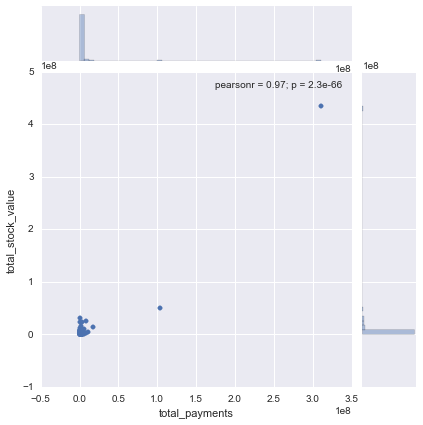

In [6]:
import seaborn as sns
%matplotlib inline
## if NaN strings are kept, need to create a new df that screens these values
#df_plt = df[(df.total_payments != "NaN") & (df.total_stock_value != "NaN")]

## pair plot below would be ideal (incorrect syntax) to detect outliers...
#sns.pairplot(df, x_vars=['total_stock_value', 'total_payments'], y_vars= \
    #['total_stock_value', 'total_payments'], kind="scatter", dropna=True)
## instead of pair plot (cannot render), using 'total_payments' and
## 'total_stock_value' features to detect outliers
sns.jointplot(x="total_payments", y="total_stock_value", data=df, dropna=True)
sns.plt.show()

In [7]:
## the plot shows one clear outlier which we also found in lesson 7, 'TOTAL'
out2name = df['total_payments'].idxmax()
print "\nSecond outlier removed is:", out2name 
df = df.drop('TOTAL')
#data_dict.pop('TOTAL') ## again, not necessary here


Second outlier removed is: TOTAL


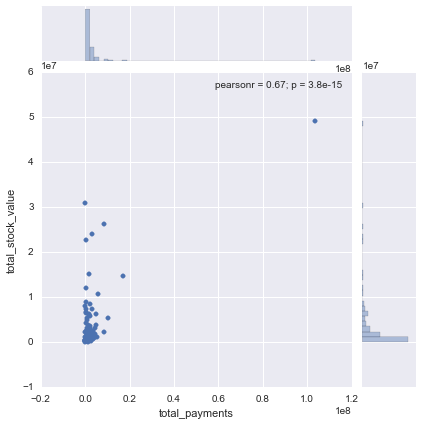

In [8]:
## check if any more outliers
sns.jointplot(x="total_payments", y="total_stock_value", data=df, dropna=True)
sns.plt.show()  ## one more clear outlier

In [9]:
## second outlier, 'LAY KENNETH L'
out3name = df['total_payments'].idxmax()
print "\nThird outlier NOT removed is:", out3name
#data_dict.pop(out3name) ## again, not necessary here
#df = df.drop(out3name) ## we have too few POIs/data to remove this anyway


Third outlier NOT removed is: LAY KENNETH L


In [10]:
## remove people(s) with no financial data
no_data = df[df[financial_features].isnull().all(axis = 1)].index.values
print "\nFourth person removed with no data:", no_data
df = df.drop(no_data)


Fourth person removed with no data: ['LOCKHART EUGENE E']


In [11]:
## this would remove all people with no total payments and no total stock value
#no_data = df[np.isnan(df.total_payments) & \
    #np.isnan(df.total_stock_value)].index.values.tolist()
#print "\nPeople with no data removed from dataset: ", no_data, "\n"
#for person in no_data:
#    df = df.drop(person)
#    #data_dict.pop(person)


### Convert DataFrame Back to Dictionary
df = df.replace(np.nan, 'NaN') ## convert np.nan back to 'NaN' for Task 3
#data_dict = df.to_dict(orient = 'index') ## doesn't work, 'index' deprecated?
df = df.transpose()
data_dict = df.to_dict()


### Inspect Test/Train Split
data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
print "\n", len(labels_train), "total people in the TRAINING set with", \
    sum(labels_train), "POIs at", 100.0*sum(labels_train)/len(labels_train), \
    "percent."
print len(labels_test), "total people in the TEST set with", \
    sum(labels_test), "POIs at", 100.0*sum(labels_test)/len(labels_test), \
    "percent."


100 total people in the TRAINING set with 13.0 POIs at 13.0 percent.
43 total people in the TEST set with 5.0 POIs at 11.6279069767 percent.


In [12]:
### Task 3: Feature Engineering and Feature Selection

### Prune Financial Features based upon Data Exploration

df = df.transpose()[features_list] ## same df from the outlier removal section
df = df.replace('NaN', np.nan)

## creating list of important features by number of non-null values
feature_data = []
alpha = 1.0* sum(df.poi != True) / sum(df.poi == True)
## weighting POIs by their proportion in the data set

for ftr in list(df.columns.values):
    if ftr not in ['poi']:
        n_poi = sum( df[df.poi == True][ftr].notnull() )
        n_non_poi = sum( df[df.poi != True][ftr].notnull() )
        feature_data.append([ftr, (alpha*n_poi + n_non_poi)])
        
feature_data = sorted(feature_data, key=lambda x: x[1], reverse = True)
new_features = [ftr[0] for ftr in feature_data[0:8]] ## top 8
features_list = ['poi'] + new_features ## take top 8 and add back POI

## remove new people with no data in updated features
no_data = df[df[new_features].isnull().all(axis = 1)].index.values
no_data = ''.join(no_data) ## only 1
data_dict.pop(no_data)
    
print "\n\n\nTop 8 features with most data:", new_features
## exclude POI in the printed list
print "\nExcluding these features because of limited data:", \
    [ftr for ftr in list(df.columns.values) if ftr not in features_list]
print "\nRemoved 1 additional person with no data in new features:", \
    no_data, "\n\n\n"




Top 8 features with most data: ['total_stock_value', 'total_payments', 'restricted_stock', 'expenses', 'other', 'salary', 'bonus', 'exercised_stock_options']

Excluding these features because of limited data: ['deferral_payments', 'loan_advances', 'restricted_stock_deferred', 'deferred_income', 'long_term_incentive', 'director_fees']

Removed 1 additional person with no data in new features: POWERS WILLIAM 





In [13]:
### Creating Suspicious Words Features

## adding email text data for each person
from add_email_words import add_words
## adds all email text as a string for each person in data_dict[person]['words']
print "Processing emails...\n"
data_dict = add_words(data_dict, all=False, n=100)
## 'all' to process entire corpus, n is number of emails/person, default is 30

Processing emails...



In [14]:
## getting list of suspicious words
from get_important_words import get_words
print "\nGetting important words..."
impt_words = get_words(data_dict)
## add 1 important word manually, the DT classifier doesn't always find it...
if u'boardroom' not in impt_words:
    impt_words.append(u'boardroom')
    
print "\nSuspicious words are:", impt_words


Getting important words...

Accuracy of word-based DT classifier on test data is:  0.813953488372

Number of important/suspicious words:  1

Suspicious words are: [u'blown', u'boardroom']


In [15]:
## add count of suspicious words in data_dict[person]['suspicious_word_here']
from add_word_count import add_count
print "\nAdding suspicious word counts..."
data_dict = add_count(data_dict, impt_words)

## removing 'word' feature from data_dict, no longer needed
for person in data_dict:
    data_dict[person].pop("words")

## rename
word_features = impt_words

## add to word features to feature list
features_list += word_features


Adding suspicious word counts...


In [16]:
### Selecting Best Features (IMPLEMENTED HERE, CANNOT BE DONE IN A PIPELINE)

from feature_selector import select_best
print "\n\n\nGetting best features..."
best_features = select_best(data_dict, features_list, 6)

final_features = best_features
## the best 6 aren't always the same here, input manually to be sure
final_features = ['total_stock_value', u'boardroom', 'bonus', u'blown', \
    'exercised_stock_options', 'restricted_stock'] #, 'salary']
print "\nFinal Features Used: ", final_features, "\n"


### Store to my_dataset for easy export below.
my_dataset = data_dict
features_list = ['poi'] + final_features


### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)




Getting best features...

Feature correlations with target POI:  [['exercised_stock_options', 0.38614172371941746], [u'boardroom', 0.38559182454491342], ['total_stock_value', 0.3818527898289249], ['bonus', 0.35757485375792092], ['salary', 0.33755743852073739], [u'blown', 0.28549606996586574], ['restricted_stock', 0.24678144023781862], ['total_payments', 0.24151254577240416], ['expenses', 0.20198329579911534], ['other', 0.16925452471513738]]
Best features from univariate pearson correlation analysis (low to high):  [(1, u'blown'), (2, 'salary'), (3, 'bonus'), (4, 'total_stock_value'), (5, u'boardroom'), (6, 'exercised_stock_options')]
Worst features with less than 0.25 linear correlation with POI:  ['restricted_stock', 'total_payments', 'expenses', 'other']

Correlation between feature pairs:  [['exercised_stock_options', u'boardroom', -0.040840763308241608], ['exercised_stock_options', u'blown', -0.040649811954048223], ['total_stock_value', u'blown', -0.030157916098639534], [u'board

In [17]:
### Task 4: Try a varity of classifiers

from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
from sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier()
from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier()
from sklearn.cluster import KMeans ## To do...
#clf = KMeans(n_clusters=2)


### Scaling and PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

estimators = [('scaler', StandardScaler()), ('reducer', PCA()), \
    ('ada', AdaBoostClassifier())]  ## scaling and PCA vastly improve AdaBoost
#estimators = [('scaler', MinMaxScaler()), \
    #('knn',  KNeighborsClassifier())] ## KNN requires range scaling


### Classifier Selection
#clf = GaussianNB()  ## this is the benchmark 
clf = Pipeline(estimators)

In [18]:
### Parameter Optimization
#from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

## standard scaler, pca, adaboost
parameters = dict(ada__base_estimator = \
    [DecisionTreeClassifier(), DecisionTreeClassifier(max_depth = 5), \
    DecisionTreeClassifier(max_depth = 8)], \
    ada__learning_rate = [5.0, 10.0, 20.0])
## min-max scaler, knn
#parameters = dict(knn__n_neighbors = range(1, 6), \
    #knn__weights = ['uniform', 'distance'])

sss = StratifiedShuffleSplit(labels_train, random_state = 11)
## best cross-validation method for small data set and few POIs
clf = GridSearchCV(clf, param_grid = parameters, scoring = 'recall', \
    cv = sss, verbose = 1)  ## maximizing the f1 score, recall results in same

## grid fit for best estimator
clf.fit(features_train, labels_train)

## assign classifier to best estimator
clf = clf.best_estimator_
print "\nBest parameters: \n", clf.get_params()

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.8s finished


Fitting 10 folds for each of 9 candidates, totalling 90 fits

Best parameters: 
{'reducer__n_components': None, 'ada__n_estimators': 50, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'ada__base_estimator__max_leaf_nodes': None, 'ada__base_estimator__criterion': 'gini', 'ada__base_estimator__min_weight_fraction_leaf': 0.0, 'ada__base_estimator__max_depth': None, 'scaler__copy': True, 'scaler__with_mean': True, 'reducer__copy': True, 'ada': AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=5.0, n_estimators=50, random_state=None), 'ada__base_estimator__max_features': None, 'scaler__with_std': True, 'reducer__whiten': False, 'ada__base_estimator__random_state

In [19]:
### Task 5: Tune classifier to achieve better than .3 precision and recall 

### Evaluation Metrics
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score, f1_score

## convert features and labels to arrays
#print type(labels), type(features)
features = np.asarray(features)
labels = np.asarray(labels)

## lists of metrics
accuracy = []
precision = []
recall = []
f_one = []

## or for classification report
total_labels = np.array([])
total_preds = np.array([])

folds = 200
sss = StratifiedShuffleSplit(labels, folds, test_size = 0.3, random_state = 11)

for train_idx, test_idx in sss:
    features_train, labels_train = features[train_idx], labels[train_idx]
    features_test, labels_test = features[test_idx], labels[test_idx]
    
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    #pred = clf.fit_predict(features) ## k-means
    
    #acc = clf.score(features_test, labels_test)
    acc = accuracy_score(labels_test, pred)
    pre = precision_score(labels_test, pred)
    rec = recall_score(labels_test, pred)
    f1 = f1_score(labels_test, pred)
    
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    f_one.append(f1)
    
    total_labels = np.concatenate((total_labels, labels_test))
    total_preds = np.concatenate((total_preds, pred))

## not quite the same as tester.py
print "\nAccuracy: ", sum(accuracy)/folds, "\nPrecision: ", \
    sum(precision)/folds, "\nRecall: ", sum(recall)/folds, \
    "\nF1-Score: ", sum(f_one)/folds


Accuracy:  0.856538461538 
Precision:  0.470042846043 
Recall:  0.485 
F1-Score:  0.450472527473


In [20]:
## using sklearn
from sklearn.metrics import classification_report
## precision, recall, f1-score, and support (number of occurrences in test set)
print "\n", classification_report(total_labels, total_preds, \
    target_names=['non-POI', 'POI']) ## these scores appear to be less accurate


             precision    recall  f1-score   support

    non-POI       0.92      0.91      0.92      6800
        POI       0.45      0.48      0.46      1000

avg / total       0.86      0.86      0.86      7800



In [21]:
### Task 6: Dump classifier, dataset, and features_list for tester.py

dump_classifier_and_data(clf, my_dataset, features_list)


Using additional script for better evaluation metrics...


In [23]:
import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/") # DIFFERENT GITHUB PATH HERE
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    pickle.dump(clf, open(CLF_PICKLE_FILENAME, "w") )
    pickle.dump(dataset, open(DATASET_PICKLE_FILENAME, "w") )
    pickle.dump(feature_list, open(FEATURE_LIST_FILENAME, "w") )

def load_classifier_and_data():
    clf = pickle.load(open(CLF_PICKLE_FILENAME, "r") )
    dataset = pickle.load(open(DATASET_PICKLE_FILENAME, "r") )
    feature_list = pickle.load(open(FEATURE_LIST_FILENAME, "r"))
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

In [24]:
main()

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reducer', PCA(copy=True, n_components=None, whiten=False)), ('ada', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            ...dom_state=None, splitter='best'),
          learning_rate=5.0, n_estimators=50, random_state=None))])
	Accuracy: 0.84869	Precision: 0.50833	Recall: 0.50350	F1: 0.50590	F2: 0.50446
	Total predictions: 13000	True positives: 1007	False positives:  974	False negatives:  993	True negatives: 10026

